In [4]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import os

#import files
import sys
sys.path.append('../')
from scripts.distribution import *
from scripts.feature_engineering import *
from scripts.visualizations import *
from scripts.data_manip import *
from scripts.modeling import *


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# customize different personal options
plt.style.use('ggplot')

# EDA

> ## Data Overview

In [6]:
csv_file_name = 'data.csv'

path_to_csv = os.path.join('..', 'docs', 'data', csv_file_name)

data = pd.read_csv(path_to_csv)

data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
data.shape # cols and rows

(95662, 16)

In [8]:
data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [9]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [10]:
print(f'Number of rows: {data.shape[0]}')
for col in data.columns:
    print(f'{col}: {data[col].nunique()}')

Number of rows: 95662
TransactionId: 95662
BatchId: 94809
AccountId: 3633
SubscriptionId: 3627
CustomerId: 3742
CurrencyCode: 1
CountryCode: 1
ProviderId: 6
ProductId: 23
ProductCategory: 9
ChannelId: 4
Amount: 1676
Value: 1517
TransactionStartTime: 94556
PricingStrategy: 4
FraudResult: 2


In [11]:
display_skewness(data)

CountryCode
Skewness: 0.0
Kurtosis: 0.0
Amount
Skewness: 51.098489522819115
Kurtosis: 3363.1277386950474
Value
Skewness: 51.29108598736249
Kurtosis: 3378.069273754232
PricingStrategy
Skewness: 1.6590573072757961
Kurtosis: 2.087533632908269
FraudResult
Skewness: 22.196294806589147
Kurtosis: 490.6857618799325


In [12]:
print(data[data['FraudResult']==0].shape[0])
print(data[data['FraudResult']==1].shape[0])

95469
193


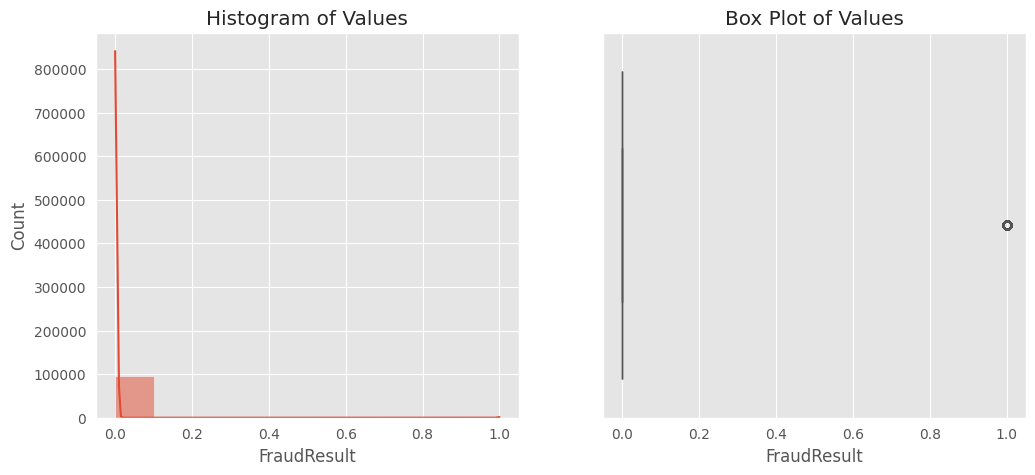

In [13]:
plot_fraud_result(data)

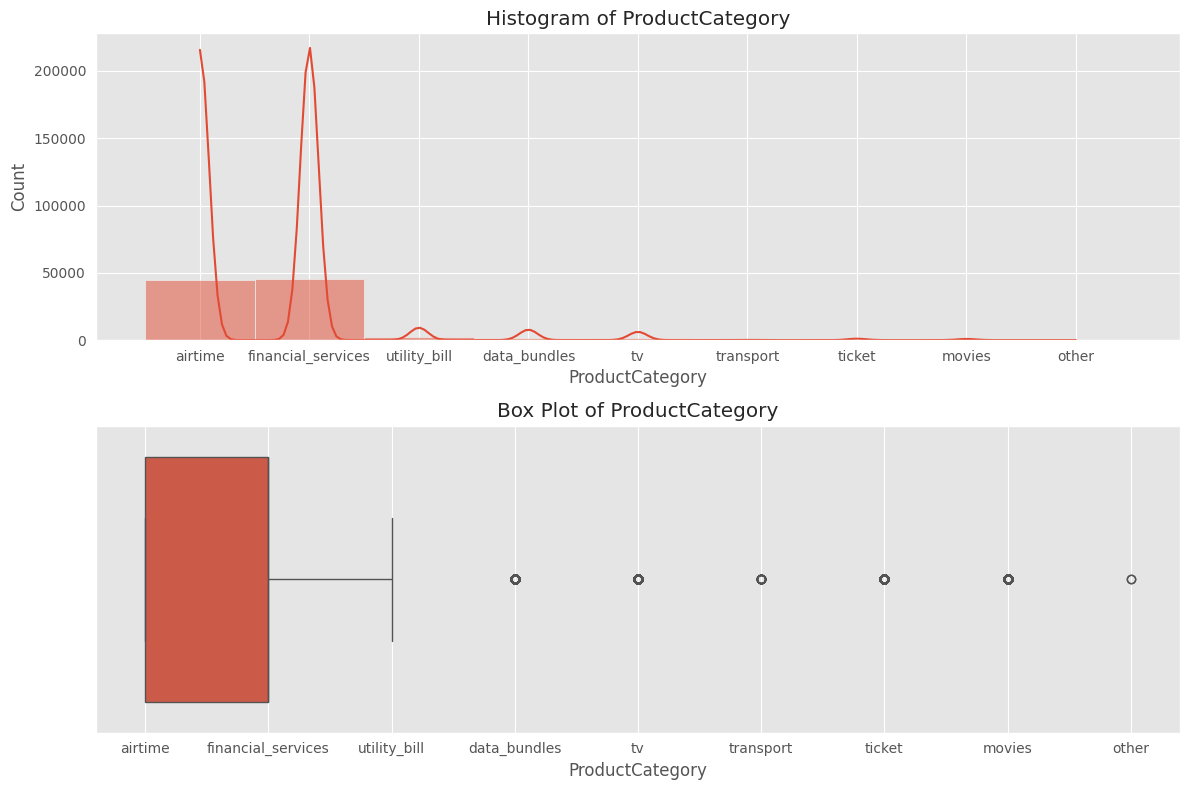

In [14]:
plot_product_category(data)

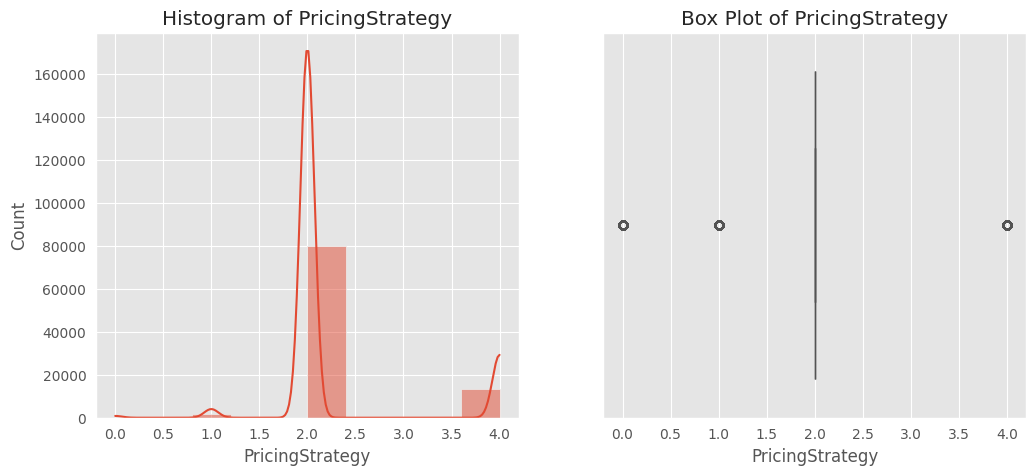

In [15]:
pricing_strategy(data)

>> ### Distribution of Numerical Features

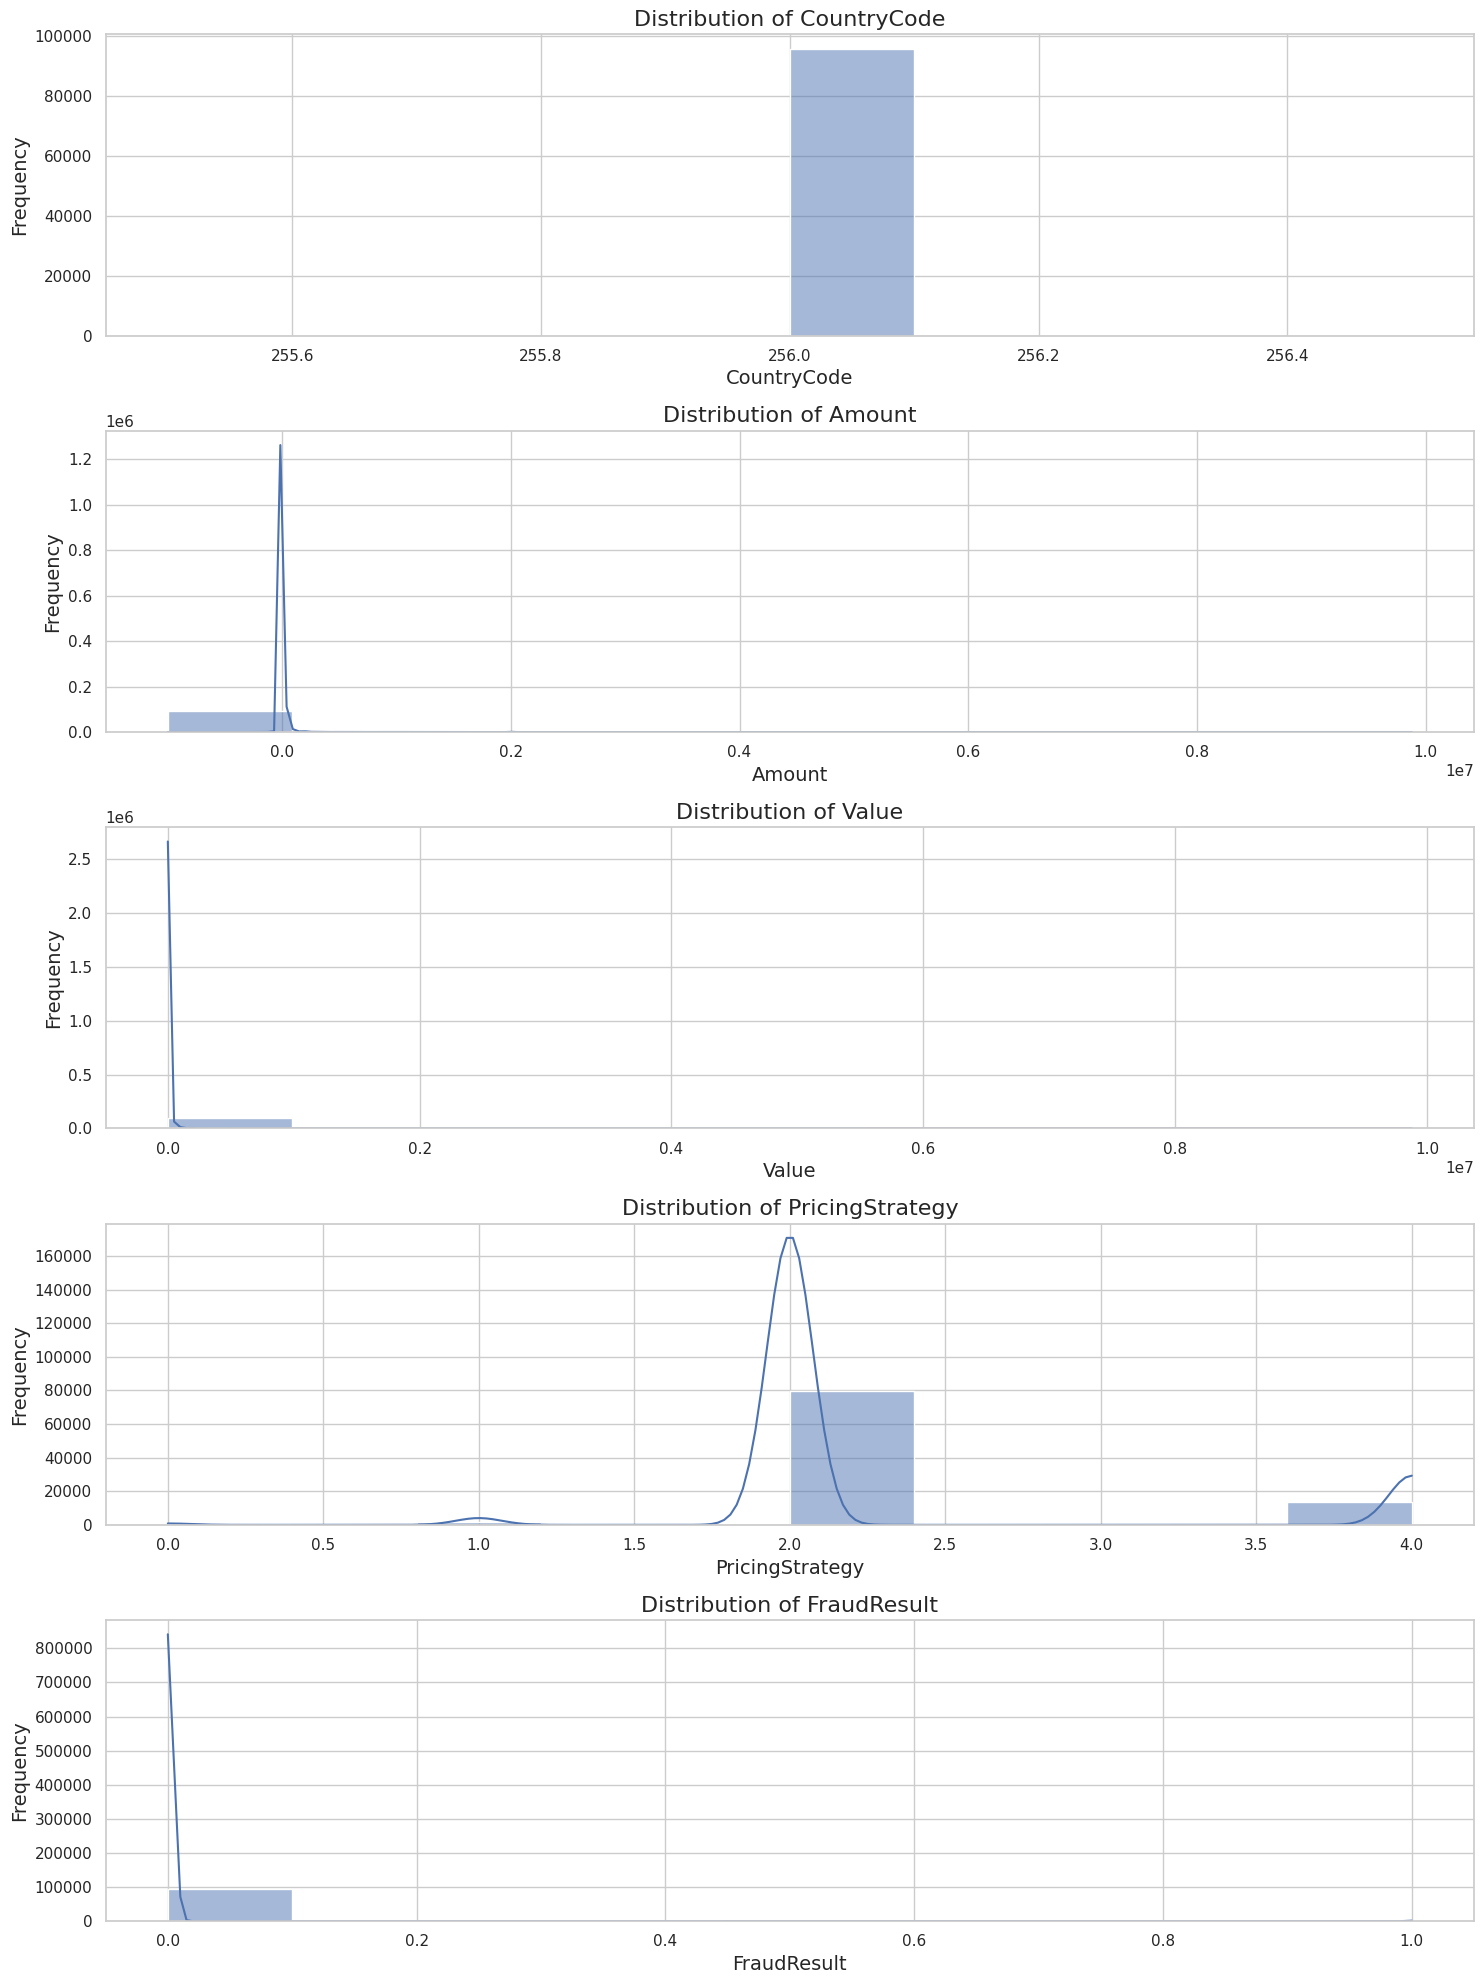

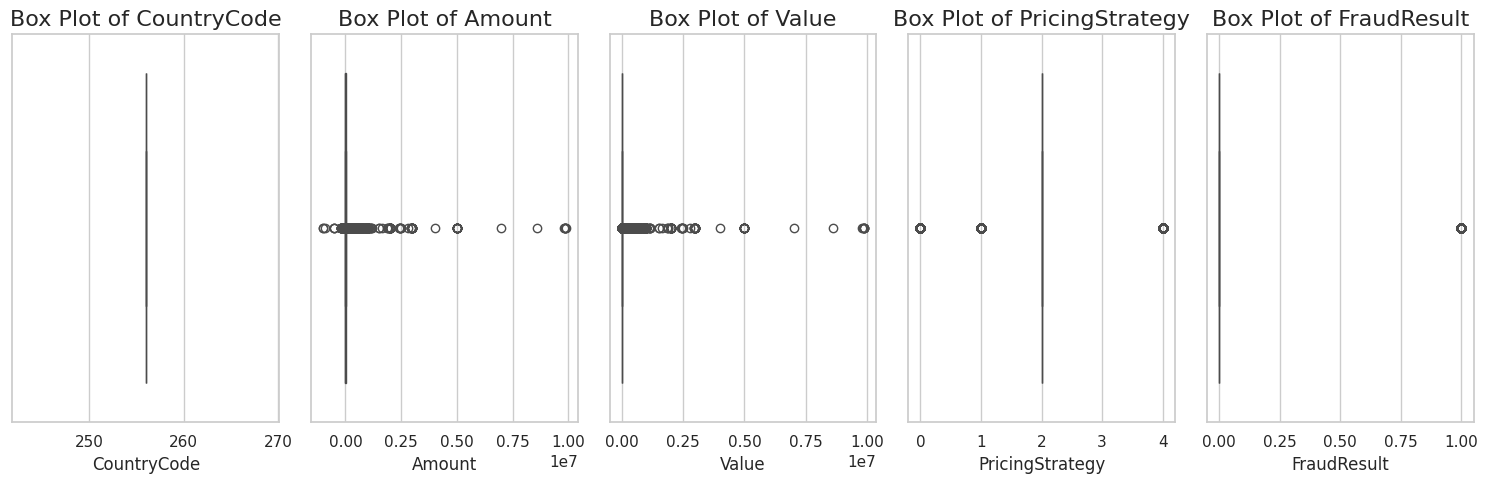

In [16]:
visualize_numerical_features(data)

>> ### Distribution of Categorical Features

In [17]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [18]:
data[['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId']]

,CurrencyCode,CountryCode,ProviderId,ProductId
0,UGX,256,ProviderId_6,ProductId_10
1,UGX,256,ProviderId_4,ProductId_6
2,UGX,256,ProviderId_6,ProductId_1
3,UGX,256,ProviderId_1,ProductId_21
4,UGX,256,ProviderId_4,ProductId_6
...,...,...,...,...
95657,UGX,256,ProviderId_4,ProductId_6
95658,UGX,256,ProviderId_6,ProductId_10
95659,UGX,256,ProviderId_4,ProductId_6
95660,UGX,256,ProviderId_6,ProductId_19


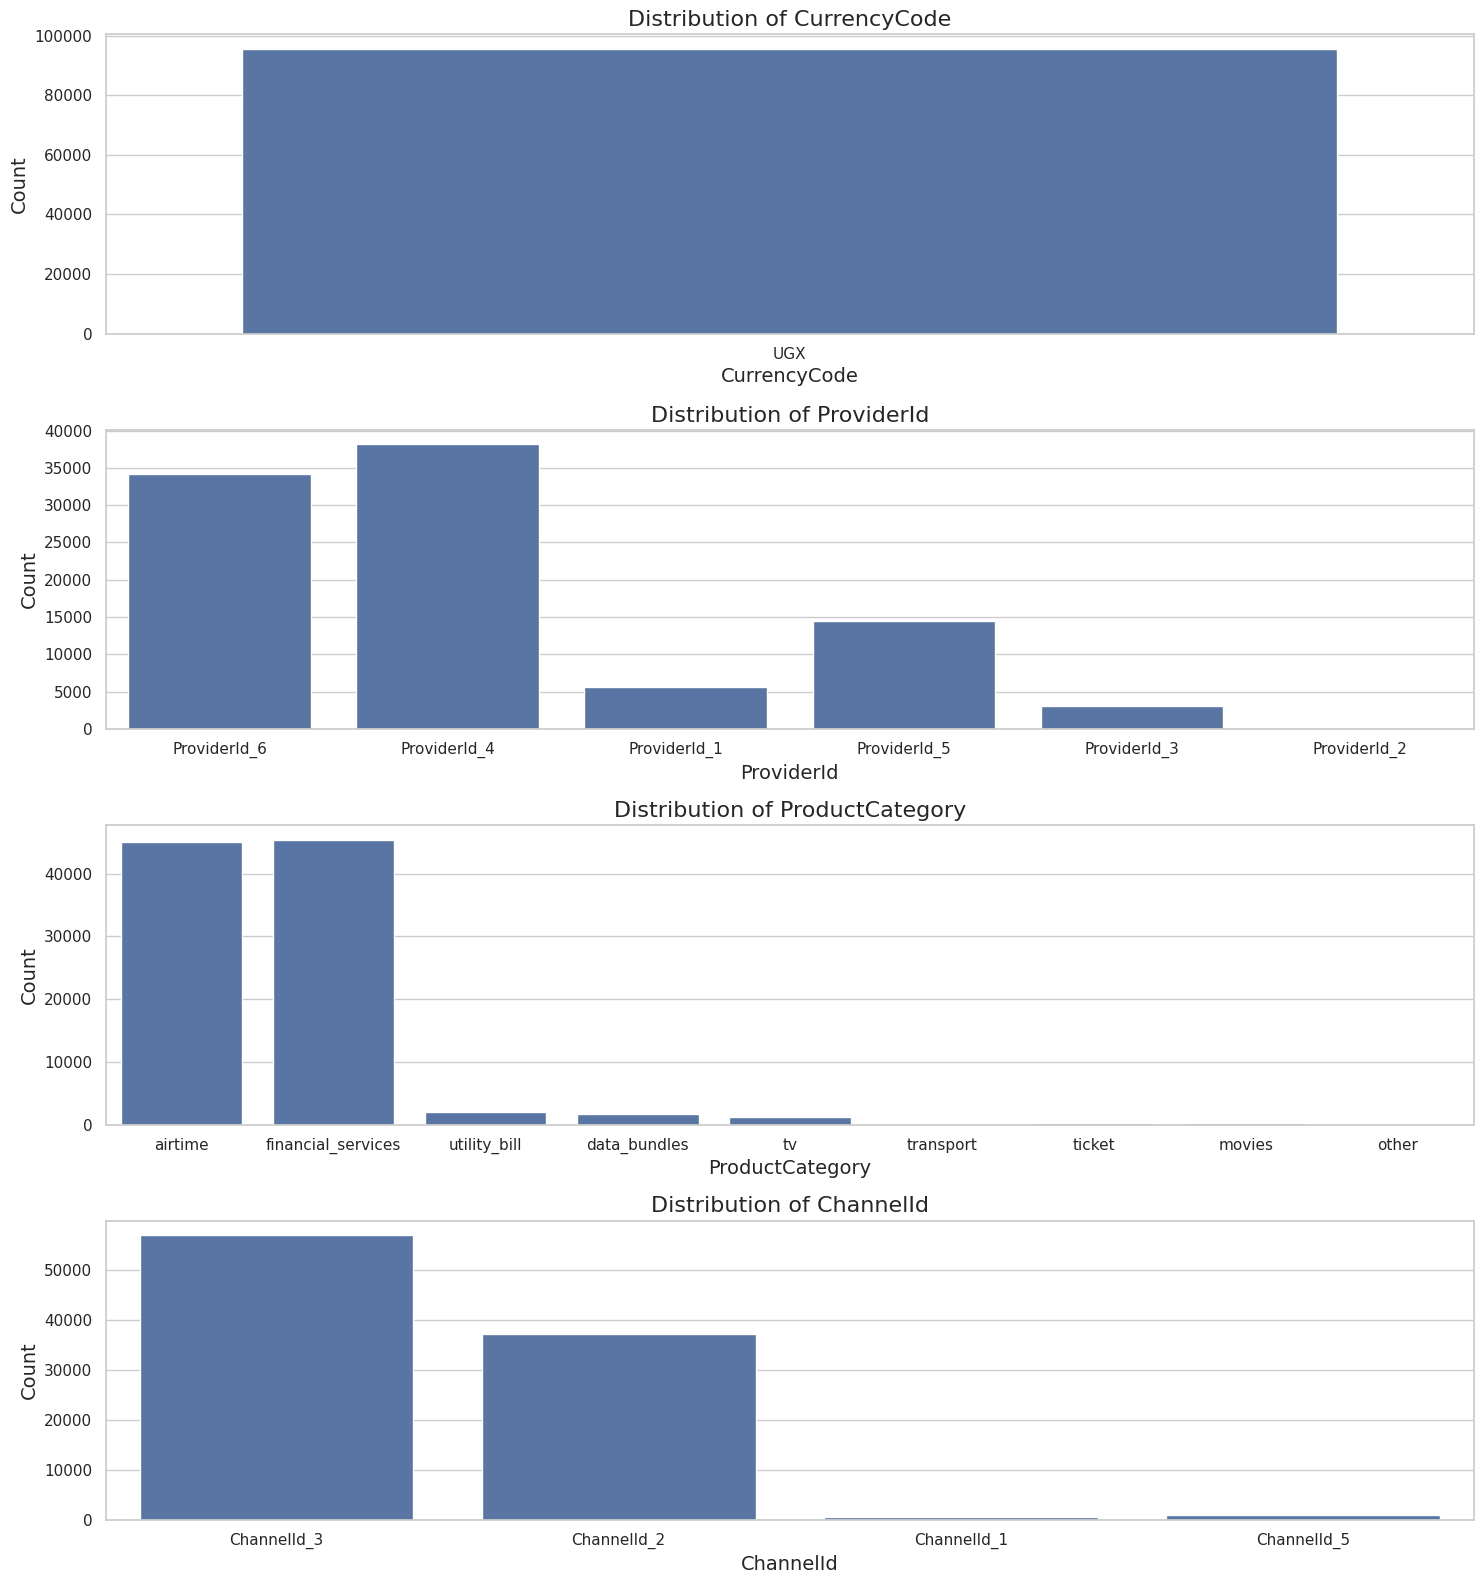

In [19]:
datav = data[[ 'CurrencyCode', 'CountryCode', 'ProviderId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'FraudResult']]
visualize_categorical_features(datav)

In [20]:
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols]

,CountryCode,Amount,Value,PricingStrategy,FraudResult
0,256,1000.0,1000,2,0
1,256,-20.0,20,2,0
2,256,500.0,500,2,0
3,256,20000.0,21800,2,0
4,256,-644.0,644,2,0
...,...,...,...,...,...
95657,256,-1000.0,1000,2,0
95658,256,1000.0,1000,2,0
95659,256,-20.0,20,2,0
95660,256,3000.0,3000,2,0


> ## Correlation Analysis

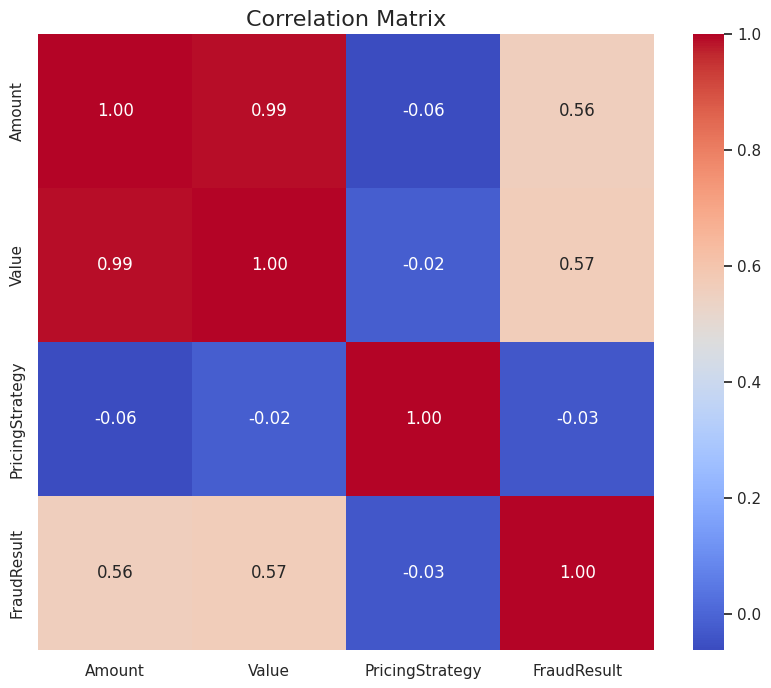

In [21]:
# Call the function
correlation_analysis(data)

> ## Identifying Missing Values

In [22]:
find_missing_values(data)

Missing Values Summary: TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


# Feature Engineering

In [23]:
data.sample(1)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
84206,TransactionId_23036,BatchId_2863,AccountId_4384,SubscriptionId_2239,CustomerId_4841,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-03T13:19:12Z,2,0


In [24]:
data['CustomerId'] = data['CustomerId'].astype(str)

aggregated = aggregate_features(data, 'CustomerId')

aggregated['CustomerId'] = aggregated['CustomerId'].astype(str)

data = pd.merge(data, aggregated, on='CustomerId', how='left')

nan_average = data[data['Average_Transaction_Amount'].isna()].head()
print(nan_average)


Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult, Total_Transaction_Amount, Average_Transaction_Amount, Transaction_Count, Std_Deviation_Transaction_Amount]
Index: []


In [25]:
data.sample(20)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount
40154,TransactionId_45762,BatchId_38784,AccountId_3441,SubscriptionId_3150,CustomerId_3876,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-25T12:38:42Z,2,0,474891.00,1246.433071,381,3409.446666
32664,TransactionId_59168,BatchId_68273,AccountId_827,SubscriptionId_203,CustomerId_1171,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1500.0,1500,2018-12-19T10:42:01Z,2,0,3925.00,654.166667,6,1373.901076
14018,TransactionId_90833,BatchId_102252,AccountId_4389,SubscriptionId_4791,CustomerId_4846,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-03T15:20:51Z,2,0,737132.00,4006.152174,184,8199.221329
50692,TransactionId_124956,BatchId_20656,AccountId_3147,SubscriptionId_3644,CustomerId_3573,UGX,256,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,10000.0,11200,2019-01-04T14:42:20Z,2,0,9000.00,4500.000000,2,7778.174593
4253,TransactionId_127040,BatchId_115992,AccountId_4841,SubscriptionId_3829,CustomerId_2477,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-100.0,100,2018-11-20T05:36:37Z,2,0,611700.50,1973.227419,310,5375.130091
48553,TransactionId_39311,BatchId_7686,AccountId_115,SubscriptionId_2859,CustomerId_437,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-01-01T14:02:56Z,2,0,22615.00,4523.000000,5,8740.846355
22997,TransactionId_25165,BatchId_74329,AccountId_3979,SubscriptionId_1409,CustomerId_4429,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,500.0,500,2018-12-11T09:08:32Z,2,0,23225.00,893.269231,26,1293.523825
82856,TransactionId_96643,BatchId_9520,AccountId_4841,SubscriptionId_3829,CustomerId_4979,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-01T21:48:36Z,2,0,7075.00,1010.714286,7,2007.271009
84598,TransactionId_37564,BatchId_91778,AccountId_4841,SubscriptionId_3829,CustomerId_3912,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-03T18:57:18Z,2,0,2578665.74,6067.448800,425,97013.231841
44956,TransactionId_124132,BatchId_122577,AccountId_515,SubscriptionId_71,CustomerId_848,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2018-12-28T16:29:19Z,1,0,19000.00,3166.666667,6,7626.707459


In [26]:
time_correction(data)
data[['TransactionStartTime', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Transaction_Year']].head()

,TransactionStartTime,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   TransactionId                     95662 non-null  object             
 1   BatchId                           95662 non-null  object             
 2   AccountId                         95662 non-null  object             
 3   SubscriptionId                    95662 non-null  object             
 4   CustomerId                        95662 non-null  object             
 5   CurrencyCode                      95662 non-null  object             
 6   CountryCode                       95662 non-null  int64              
 7   ProviderId                        95662 non-null  object             
 8   ProductId                         95662 non-null  object             
 9   ProductCategory                   95662 non-null  object     

In [28]:
data.sample(0)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year


In [29]:
data = one_hot_encoder(data)


Shape of encoded features: (95662, 38)


In [30]:
pd.set_option('display.max_columns',None)
data.head()

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,256,1000.0,1000,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,256,-20.0,20,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,256,500.0,500,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,256,20000.0,21800,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,256,-644.0,644,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


In [32]:
print(data.isnull().sum())

data[data.select_dtypes(include=[np.number]).columns] = null_value_imputing_KNN(data)


TransactionStartTime                  0
TransactionId                         0
AccountId                             0
CustomerId                            0
BatchId                               0
SubscriptionId                        0
ProviderId_ProviderId_2               0
ProviderId_ProviderId_3               0
ProviderId_ProviderId_4               0
ProviderId_ProviderId_5               0
ProviderId_ProviderId_6               0
ProductId_ProductId_10                0
ProductId_ProductId_11                0
ProductId_ProductId_12                0
ProductId_ProductId_13                0
ProductId_ProductId_14                0
ProductId_ProductId_15                0
ProductId_ProductId_16                0
ProductId_ProductId_19                0
ProductId_ProductId_2                 0
ProductId_ProductId_20                0
ProductId_ProductId_21                0
ProductId_ProductId_22                0
ProductId_ProductId_23                0
ProductId_ProductId_24                0


In [33]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [34]:
# Display the standardized DataFrame
print("Standardized DataFrame:")
Standardize(data,numerical_columns).head()

Standardized DataFrame:


,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,-0.013719,-0.182517,-0.815149,-0.423397,1.341000,2.284355,-0.12085,-0.004572,-0.055712,-0.091194,-0.378077,-0.010225,-0.100947,-0.04973,-0.047572,-0.126726,-0.034237,-0.003233,-0.04281,-0.018005,-0.584247,-0.160521,-0.016168,-0.719579,-0.029997,-0.045427,-0.013332,-0.13096,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245,0.0,-0.046371,-0.072291,-0.349252,-0.044962,0.170118,-0.067623,-0.311831,-0.168001,-2.155530,-0.100739,0.848684,-0.994246
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,-0.013719,-0.182517,1.226769,-0.423397,-0.745712,-0.437760,-0.12085,-0.004572,-0.055712,-0.091194,-0.378077,-0.010225,-0.100947,-0.04973,-0.047572,-0.126726,-0.034237,-0.003233,-0.04281,-0.018005,-0.584247,-0.160521,-0.016168,1.389701,-0.029997,-0.045427,-0.013332,-0.13096,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245,0.0,-0.054643,-0.080251,-0.349252,-0.044962,0.170118,-0.067623,-0.311831,-0.168001,-2.155530,-0.100739,0.848684,-0.994246
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,-0.013719,-0.182517,-0.815149,-0.423397,1.341000,-0.437760,-0.12085,-0.004572,-0.055712,-0.091194,-0.378077,-0.010225,-0.100947,-0.04973,-0.047572,-0.126726,-0.034237,-0.003233,-0.04281,-0.018005,-0.584247,-0.160521,-0.016168,-0.719579,-0.029997,-0.045427,-0.013332,-0.13096,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245,0.0,-0.050426,-0.076352,-0.349252,-0.044962,0.165122,-0.072568,-0.444993,-0.202150,-2.155530,-0.100739,0.848684,-0.994246
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,-0.013719,-0.182517,-0.815149,-0.423397,-0.745712,-0.437760,-0.12085,-0.004572,-0.055712,-0.091194,-0.378077,-0.010225,-0.100947,-0.04973,-0.047572,7.891040,-0.034237,-0.003233,-0.04281,-0.018005,-0.584247,-0.160521,-0.016168,-0.719579,-0.029997,-0.045427,-0.013332,-0.13096,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,6.987414,-0.796656,0.824740,-0.105245,0.0,0.107717,0.096648,-0.349252,-0.044962,0.175567,-0.008155,-0.404020,-0.009434,-1.949214,-0.100739,0.848684,-0.994246
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,-0.013719,-0.182517,1.226769,-0.423397,-0.745712,-0.437760,-0.12085,-0.004572,-0.055712,-0.091194,-0.378077,-0.010225,-0.100947,-0.04973,-0.047572,-0.126726,-0.034237,-0.003233,-0.04281,-0.018005,-0.584247,-0.160521,-0.016168,1.389701,-0.029997,-0.045427,-0.013332,-0.13096

# Default estimator and WoE binning 

In [35]:
import pandas as pd
# Assuming df is your original DataFrame with all transactions
rfms_scores = combine_rfms(data, 'CustomerId')
rfms_classification = classify_customers_by_rfms(rfms_scores)

rfms_classification.head()

/home/am/PycharmProjects/Credit-Scoring_and_Risk-Analysis/scripts/calculations.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df[transaction_time_col].dt.to_period('M')  # Create a 'Month' column


,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory
CustomerId,,,,,,
CustomerId_1,83,1,-10000.0,1,1.6,Bad
CustomerId_10,83,1,-10000.0,1,1.6,Bad
CustomerId_1001,89,5,20000.0,1,2.3,Bad
CustomerId_1002,25,11,4225.0,3,2.0,Bad
CustomerId_1003,11,6,20000.0,1,1.4,Bad


In [36]:
rfms_classification.head()

,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory
CustomerId,,,,,,
CustomerId_1,83,1,-10000.0,1,1.6,Bad
CustomerId_10,83,1,-10000.0,1,1.6,Bad
CustomerId_1001,89,5,20000.0,1,2.3,Bad
CustomerId_1002,25,11,4225.0,3,2.0,Bad
CustomerId_1003,11,6,20000.0,1,1.4,Bad


>> ## Woe binning

In [37]:
data = pd.merge(data, rfms_classification, on='CustomerId', how='left')
data.head()

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Month,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory
0,2018-11-15 02:18:49+00:00,TransactionId_76871,AccountId_3957,CustomerId_4406,BatchId_36123,SubscriptionId_887,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,1000.0,1000.0,2.0,0.0,109921.75,923.712185,119.0,3042.294251,2.0,15.0,11.0,2018.0,2018-11,0,119,109921.75,4,2.1,Bad
1,2018-11-15 02:19:08+00:00,TransactionId_73770,AccountId_4841,CustomerId_4406,BatchId_15642,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-20.0,20.0,2.0,0.0,109921.75,923.712185,119.0,3042.294251,2.0,15.0,11.0,2018.0,2018-11,0,119,109921.75,4,2.1,Bad
2,2018-11-15 02:44:21+00:00,TransactionId_26203,AccountId_4229,CustomerId_4683,BatchId_53941,SubscriptionId_222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,500.0,500.0,2.0,0.0,1000.00,500.000000,2.0,0.000000,2.0,15.0,11.0,2018.0,2018-11,81,2,1000.00,1,1.6,Bad
3,2018-11-15 03:32:55+00:00,TransactionId_380,AccountId_648,CustomerId_988,BatchId_102363,SubscriptionId_2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,256.0,20000.0,21800.0,2.0,0.0,228727.20,6019.136842,38.0,17169.241610,3.0,15.0,11.0,2018.0,2018-11,5,38,228727.20,4,2.5,Good
4,2018-11-15 03:34:21+00:00,TransactionId_28195,AccountId_4841,CustomerId_988,BatchId_38780,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-644.0,644.0,2.0,0.0,228727.20,6019.136842,38.0,17169.241610,3.0,15.0,11.0,2018.0,2018-11,5,38,228727.20,4,2.5,Good


In [38]:
data['TotalRFMS'] = data['Recency'].astype(int) + data['Frequency'].astype(int) + data['Monetary'].astype(int) + data['Seasonality'].astype(int)


In [39]:
print(data[['CustomerId', 'Recency', 'Frequency', 'Monetary','Seasonality', 'TotalRFMS']].head())

        CustomerId  Recency  Frequency   Monetary  Seasonality  TotalRFMS
0  CustomerId_4406        0        119  109921.75            4     110044
1  CustomerId_4406        0        119  109921.75            4     110044
2  CustomerId_4683       81          2    1000.00            1       1084
3   CustomerId_988        5         38  228727.20            4     228774
4   CustomerId_988        5         38  228727.20            4     228774


In [40]:
calculate_risk_category(data)

        CustomerId  Recency  Frequency   Monetary  Seasonality RiskCategory
0  CustomerId_4406        0        119  109921.75            4          Bad
1  CustomerId_4406        0        119  109921.75            4          Bad
2  CustomerId_4683       81          2    1000.00            1          Bad
3   CustomerId_988        5         38  228727.20            4          Bad
4   CustomerId_988        5         38  228727.20            4          Bad


In [41]:
print(data['RiskCategory'].unique())
print(data['TotalRFMS'].describe())

['Bad' 'Good']
count    9.566200e+04
mean    -3.598680e+06
std      2.180195e+07
min     -1.048959e+08
25%      6.002200e+04
50%      2.015650e+05
75%      7.092780e+05
max      8.345137e+07
Name: TotalRFMS, dtype: float64


In [42]:
woe_df = calculate_woe(data)

      TotalRFMS  Total   Bad  Good
0    -104895878   4091  4091     0
1      -2759957      9     9     0
2      -1699962      4     4     0
3       -599964      2     2     0
4       -519969      2     2     0
...         ...    ...   ...   ...
2863   29294586     54    54     0
2864   29726142    121   121     0
2865   50805214    205   205     0
2866   60212758      7     7     0
2867   83451368    115   115     0

[2868 rows x 4 columns]


In [43]:
total_bad = woe_df['Bad'].sum()
total_good = woe_df['Good'].sum()

print(f"Total Bad: {total_bad}, Total Good: {total_good}")

Total Bad: 89170, Total Good: 6492


In [44]:
# Check for rows where either Good or Bad is zero
print(woe_df[(woe_df['Good'] == 1) | (woe_df['Bad'] == 0)])

      TotalRFMS  Total  Bad  Good
2487     227131    189    0   189
2525     250621     97    0    97
2537     261481    166    0   166
2553     277778    140    0   140
2557     279147    118    0   118
2573     292427    203    0   203
2599     323695    273    0   273
2622     351661    146    0   146
2673     475303    381    0   381
2705     589736    151    0   151
2710     611286     97    0    97
2713     616339    151    0   151
2727     689034    291    0   291
2737     736595    174    0   174
2749     798589    106    0   106
2753     818540    399    0   399
2755     842665    152    0   152
2757     847931    483    0   483
2769     942063    145    0   145
2770     947448    278    0   278
2790    1125448    484    0   484
2809    1694282    480    0   480
2810    1695825    610    0   610
2814    1769148    778    0   778


In [45]:
# Apply WoE transformation to RFMS features
for feature in ['Recency', 'Frequency', 'Monetary', 'Seasonality']:
    woe_table = calculate_woe_option(data, feature, 'RiskCategory')
    # Map WoE values back to the original data
    data[feature + '_WoE'] = data[feature].map(dict(zip(woe_table[feature], woe_table['WoE'])))

/home/am/PycharmProjects/Credit-Scoring_and_Risk-Analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/am/PycharmProjects/Credit-Scoring_and_Risk-Analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/am/PycharmProjects/Credit-Scoring_and_Risk-Analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/am/PycharmProjects/Credit-Scoring_and_Risk-Analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
data.columns

Index(['TransactionStartTime', 'TransactionId', 'AccountId', 'CustomerId',
       'BatchId', 'SubscriptionId', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_10', 'ProductId_ProductId_11',
       'ProductId_ProductId_12', 'ProductId_ProductId_13',
       'ProductId_ProductId_14', 'ProductId_ProductId_15',
       'ProductId_ProductId_16', 'ProductId_ProductId_19',
       'ProductId_ProductId_2', 'ProductId_ProductId_20',
       'ProductId_ProductId_21', 'ProductId_ProductId_22',
       'ProductId_ProductId_23', 'ProductId_ProductId_24',
       'ProductId_ProductId_27', 'ProductId_ProductId_3',
       'ProductId_ProductId_4', 'ProductId_ProductId_5',
       'ProductId_ProductId_6', 'ProductId_ProductId_7',
       'ProductId_ProductId_8', 'ProductId_ProductId_9',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategor

In [47]:
X_train, X_test, y_train, y_test,X,y = prepare_for_model(data)

In [48]:
# Initialize dictionaries to store model performance
results = {}

results, log_preds, dt_preds, gb_preds, rf_preds = modeling(X_train, X_test, y_train, y_test,results)


/home/am/PycharmProjects/Credit-Scoring_and_Risk-Analysis/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print(results)

{'Logistic Regression': {'Accuracy': 0.9315319082213975, 'ROC AUC': np.float64(0.7540140045476875), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.00      1310\n           1       0.93      1.00      0.96     17823\n\n    accuracy                           0.93     19133\n   macro avg       0.97      0.50      0.48     19133\nweighted avg       0.94      0.93      0.90     19133\n'}, 'Random Forest': {'Accuracy': 0.9315319082213975, 'ROC AUC': np.float64(0.9712647008561286), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.00      1310\n           1       0.93      1.00      0.96     17823\n\n    accuracy                           0.93     19133\n   macro avg       0.97      0.50      0.48     19133\nweighted avg       0.94      0.93      0.90     19133\n'}, 'Decision Tree': {'Accuracy': 0.9450164637014582, 'ROC AUC': np.float64(0.89951

In [51]:
model_metrics(results)

Model: Logistic Regression
Accuracy: 0.9315
ROC AUC: 0.7540
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1310
           1       0.93      1.00      0.96     17823

    accuracy                           0.93     19133
   macro avg       0.97      0.50      0.48     19133
weighted avg       0.94      0.93      0.90     19133



Model: Random Forest
Accuracy: 0.9315
ROC AUC: 0.9713
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1310
           1       0.93      1.00      0.96     17823

    accuracy                           0.93     19133
   macro avg       0.97      0.50      0.48     19133
weighted avg       0.94      0.93      0.90     19133



Model: Decision Tree
Accuracy: 0.9450
ROC AUC: 0.8995
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.30      0.43      1

In [49]:
# Decision Tree
metrics = results['Decision Tree']
print(f"Model: Decision Tree")
print(f"Accuracy: {metrics['Accuracy']:.4f}")
print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
print("Classification Report:")
print(metrics['Classification Report'])
print("\n" + "="*50 + "\n")

Model: Decision Tree
Accuracy: 0.9450
ROC AUC: 0.8995
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.30      0.43      1310
           1       0.95      0.99      0.97     17823

    accuracy                           0.95     19133
   macro avg       0.85      0.65      0.70     19133
weighted avg       0.94      0.95      0.93     19133





In [50]:
# Random Forest
metrics = results['Random Forest']
print(f"Model: Random Forest")
print(f"Accuracy: {metrics['Accuracy']:.4f}")
print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
print("Classification Report:")
print(metrics['Classification Report'])
print("\n" + "="*50 + "\n")


Model: Random Forest
Accuracy: 0.9315
ROC AUC: 0.9713
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1310
           1       0.93      1.00      0.96     17823

    accuracy                           0.93     19133
   macro avg       0.47      0.50      0.48     19133
weighted avg       0.87      0.93      0.90     19133





In [51]:

# Gradient Boosting
metrics = results['Gradient Boosting']
print(f"Model: Gradient Boosting")
print(f"Accuracy: {metrics['Accuracy']:.4f}")
print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
print("Classification Report:")
print(metrics['Classification Report'])
print("\n" + "="*50 + "\n")

Model: Gradient Boosting
Accuracy: 0.9977
ROC AUC: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1310
           1       1.00      1.00      1.00     17823

    accuracy                           1.00     19133
   macro avg       1.00      0.98      0.99     19133
weighted avg       1.00      1.00      1.00     19133





In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest ROC AUC:", roc_auc_score(y_test, rf_probs))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9996864056865102
Random Forest ROC AUC: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1310
           1       1.00      1.00      1.00     17823

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



In [53]:
from sklearn.model_selection import cross_val_score

log_cv_scores = cross_val_score(log_model, X, y, cv=5)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5)

print("Logistic Regression CV Scores:", log_cv_scores)
print("Decision Tree CV Scores:", dt_cv_scores)
print("Random Forest CV Scores:", rf_cv_scores)
print("Gradient Boosting CV Scores:", gb_cv_scores)

/home/aman/Documents/10Academy/week6/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aman/Documents/10Academy/week6/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Logistic Regression CV Scores: [0.9320023  0.90053834 0.93152833 0.93210328 0.93215555]
Decision Tree CV Scores: [0.9356609  0.93341347 0.94391595 0.93503032 0.89959231]
Random Forest CV Scores: [0.88522448 0.98954686 0.94098892 0.97491114 0.9560945 ]
Gradient Boosting CV Scores: [0.97836199 0.97726441 0.97590424 0.99733431 0.96607778]


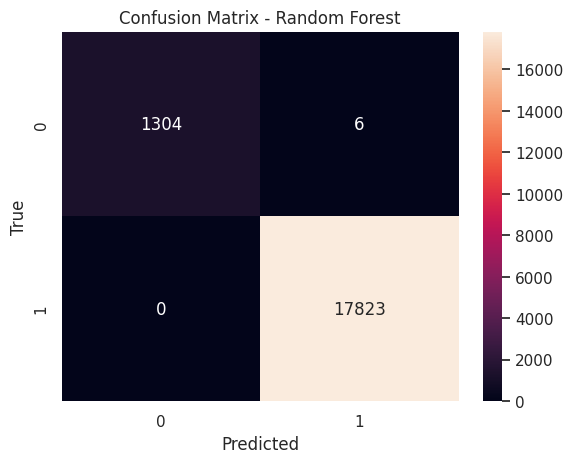

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [55]:
data['Combined_WoE'] = data[['Recency_WoE', 'Frequency_WoE', 'Monetary_WoE', 'Seasonality_WoE']].sum(axis=1)

In [56]:
data[data['Combined_WoE']>0].sample(20)

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Month,Recency,Frequency,Monetary,Seasonality,RiskScore,RiskCategory,TotalRFMS,Recency_WoE,Frequency_WoE,Monetary_WoE,Seasonality_WoE,Combined_WoE
12096,2018-11-30 17:33:50+00:00,TransactionId_28410,AccountId_4841,CustomerId_1265,BatchId_50370,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-50.0,50.0,2.0,0.0,250500.0,2582.474227,97.0,4735.234239,17.0,30.0,11.0,2018.0,2018-11,21,97,250500.0,3,2.9,Good,250621,1.339470,3.312978,-2.619842,0.699518,2.732124
38086,2018-12-23 10:31:54+00:00,TransactionId_30018,AccountId_4841,CustomerId_1908,BatchId_36314,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-20.0,20.0,2.0,0.0,128387.0,844.651316,152.0,1376.932329,10.0,23.0,12.0,2018.0,2018-12,25,152,128387.0,3,2.9,Bad,128567,0.725474,1.521219,-2.619677,0.699518,0.326533
11868,2018-11-30 15:14:23+00:00,TransactionId_121239,AccountId_4125,CustomerId_4577,BatchId_129693,SubscriptionId_979,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,1000.0,1000.0,2.0,0.0,279016.5,2364.546610,118.0,5026.735289,15.0,30.0,11.0,2018.0,2018-11,9,118,279016.5,4,2.5,Good,279147,1.096982,2.619831,-2.619842,0.500891,1.597862
62084,2019-01-16 17:50:14+00:00,TransactionId_74751,AccountId_4841,CustomerId_1908,BatchId_5012,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-12.0,12.0,2.0,0.0,128387.0,844.651316,152.0,1376.932329,17.0,16.0,1.0,2019.0,2019-01,25,152,128387.0,3,2.9,Bad,128567,0.725474,1.521219,-2.619677,0.699518,0.326533
44452,2018-12-28 13:48:18+00:00,TransactionId_104624,AccountId_1535,CustomerId_1908,BatchId_24004,SubscriptionId_3786,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,256.0,500.0,500.0,2.0,0.0,128387.0,844.651316,152.0,1376.932329,13.0,28.0,12.0,2018.0,2018-12,25,152,128387.0,3,2.9,Bad,128567,0.725474,1.521219,-2.619677,0.699518,0.326533
11870,2018-11-30 15:15:15+00:00,TransactionId_16326,AccountId_4840,CustomerId_4577,BatchId_60644,SubscriptionId_3829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,256.0,-1000.0,1000.0,2.0,0.0,279016.5,2364.546610,118.0,5026.735289,15.0,30.0,11.0,2018.0,2018-11,9,118,279016.5,4,2.5,Good,279147,1.096982,2.619831,-2.619842,0.500891,1.597862
6622

In [57]:
def calculate_woe(df, feature, target):
    table = df.groupby(feature)[target].agg(['sum', 'count'])
    table['good'] = table['count'] - table['sum']
    table['bad'] = table['sum']
    table['woe'] = np.log((table['good'] / table['count']) / (df[target].mean()))
    return table

In [58]:
def calculate_woe(data, feature, target):
    woe_df = data.groupby(feature).agg(
        Total=('RiskCategory', 'size'),
        Bad=('RiskCategory', lambda x: (x == 'Bad').sum())
    ).reset_index()

    woe_df['Good'] = woe_df['Total'] - woe_df['Bad']

    total_bad = woe_df['Bad'].sum()
    total_good = woe_df['Good'].sum()

    woe_df = woe_df[(woe_df['Good'] > 0) & (woe_df['Bad'] > 0)]

    woe_df['WoE'] = np.log((woe_df['Good'] / total_good) / (woe_df['Bad'] / total_bad))

    return woe_df[[feature, 'WoE']]

# Assuming df is your original DataFrame with all transactions
rfms_scores = combine_rfms(data, 'CustomerId')
rfms_classification = classify_customers_by_rfms(rfms_scores)

rfms_classification.head()

woe_result = calculate_woe(rfms_classification, 'RiskScore', 'RiskCategory')

# Display the result
print(woe_result)

Empty DataFrame
Columns: [RiskScore, WoE]
Index: []


/tmp/ipykernel_6271/2079383990.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df[transaction_time_col].dt.to_period('M')  # Create a 'Month' column


In [59]:
# Assuming you have a categorical feature called 'ProductCategory'
woe_product_category = calculate_woe(data, 'TotalRFMS', 'Default')

# Merge WoE values back to the original DataFrame
data = data.merge(woe_product_category, on='ProductCategory', how='left')

# Display the DataFrame with WoE values
print(data[['ProductCategory', 'WoE']].head())

KeyError: 'ProductCategory'

In [ ]:
# Example: Binning Transaction Amount into quantiles
data['Amount_Binned'] = pd.qcut(data['Amount'], q=4, labels=False)

# Calculate WoE for the binned continuous variable
woe_amount = calculate_woe(data, 'Amount_Binned', 'Default')

# Merge WoE values back to the original DataFrame
data = data.merge(woe_amount, on='Amount_Binned', how='left')

# Display the DataFrame with WoE values
print(data[['Amount_Binned', 'WoE']].head())

In [ ]:
# Optionally drop original features
data.drop(columns=['ProductCategory', 'Amount', 'Amount_Binned'], inplace=True)

# Display the final DataFrame
print(data.head())

In [47]:
from sklearn.preprocessing import KBinsDiscretizer

def woe_binning(df, target='default', feature='RFMS_score'):
    """Performs Weight of Evidence (WoE) binning for a specified feature."""
    # Create RFMS score
    df['RFMS_score'] = (df['Recency'] + df['Frequency'] + df['Monetary'] + df['Seniority']) / 4
    # Create bins for RFMS score
    bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
    df['RFMS_bin'] = bins.fit_transform(df[['RFMS_score']]).astype(int)

    # Calculate WoE
    total_good = df[target].value_counts()[0]
    total_bad = df[target].value_counts()[1]
    
    woe_dict = {}
    for bin in df['RFMS_bin'].unique():
        good_count = df[(df['RFMS_bin'] == bin) & (df[target] == 0)].count()[target]
        bad_count = df[(df['RFMS_bin'] == bin) & (df[target] == 1)].count()[target]
        
        # Prevent division by zero
        if good_count == 0: good_count = 0.5
        if bad_count == 0: bad_count = 0.5
        
        woe = np.log((good_count / total_good) / (bad_count / total_bad))
        woe_dict[bin] = woe
        
    return woe_dict

# Perform WoE binning
woe_result = woe_binning(df)
print("Weight of Evidence for each bin:")
for bin, woe in woe_result.items():
    print(f"Bin {bin}: WoE = {woe:.4f}")

KeyError: 'default'

In [43]:
data['totalRFMS'] = data['Recency'] + data['Frequency'] + data['Monetary'] + data['Seniority']

In [44]:
data.sample(0)

,TransactionStartTime,TransactionId,AccountId,CustomerId,BatchId,SubscriptionId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,ProductId_ProductId_14,ProductId_ProductId_15,ProductId_ProductId_16,ProductId_ProductId_19,ProductId_ProductId_2,ProductId_ProductId_20,ProductId_ProductId_21,ProductId_ProductId_22,ProductId_ProductId_23,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,CountryCode,Amount,Value,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Deviation_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,Frequency,Monetary,Seniority,RiskScore,RiskCategory,TotalRFMS,totalRFMS,WoE_x,WoE_y,WoE


In [46]:
calculate_woe(data,'totalRFMS','RiskCategory')

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [45]:
def calculate_woe2(df, target_col):
    # Create a DataFrame to hold the counts
    counts = df.groupby('totalRFMS')[target_col].value_counts().unstack(fill_value=0)

    # Check the counts of Good and Bad
    print("Counts of Good and Bad for each totalRFMS:")
    print(counts)

    # Calculate the total good and bad counts
    counts['Total'] = counts.sum(axis=1)
    counts['Good'] = counts.get('Good', 0)
    counts['Bad'] = counts.get('Bad', 0)

    # Calculate the Good and Bad Rate
    total_good = counts['Good'].sum()
    total_bad = counts['Bad'].sum()

    # Prevent division by zero
    counts['Good Rate'] = np.where(total_good > 0, counts['Good'] / total_good, 0)
    counts['Bad Rate'] = np.where(total_bad > 0, counts['Bad'] / total_bad, 0)

    # Calculate WoE, handling division by zero
    counts['WoE'] = np.where(
        (counts['Good Rate'] > 0) & (counts['Bad Rate'] > 0),
        np.log(counts['Good Rate'] / counts['Bad Rate']),
        np.nan
    )

    # Reset index to include totalRFMS in the result
    counts.reset_index(inplace=True)
    return counts[['totalRFMS', 'WoE']]

# Calculate WoE for totalRFMS
woe_result = calculate_woe2(data, 'RiskCategory')

# Check the WoE result before merging
print("WoE Result:")
print(woe_result)

# Merge WoE back to the original DataFrame
data = data.merge(woe_result, on='totalRFMS', how='left')

# View the updated DataFrame with WoE
print(data[['totalRFMS', 'RiskCategory', 'WoE']].head())

Counts of Good and Bad for each totalRFMS:
RiskCategory   Bad  Good
totalRFMS               
-104895793.0  4091     0
-2759925.0       9     0
-1699930.0       4     0
-599932.0        2     0
-519942.0        2     0
...            ...   ...
 29294669.0      0    54
 29726144.0    121     0
 50805283.0      0   205
 60212763.0      7     0
 83451381.0    115     0

[2977 rows x 2 columns]
WoE Result:
RiskCategory    totalRFMS  WoE
0            -104895793.0  NaN
1              -2759925.0  NaN
2              -1699930.0  NaN
3               -599932.0  NaN
4               -519942.0  NaN
...                   ...  ...
2972           29294669.0  NaN
2973           29726144.0  NaN
2974           50805283.0  NaN
2975           60212763.0  NaN
2976           83451381.0  NaN

[2977 rows x 2 columns]


/home/aman/Documents/10Academy/week6/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MergeError: Passing 'suffixes' which cause duplicate columns {'WoE_x'} is not allowed.

In [38]:
# from xverse.transformer import WOE

# def apply_woe_binning(data, target_col):
#     woe_transformer = WOE()

#     woe_transformer.fit(data[['TotalRFMS']], data[target_col])

#     data['WoE_totalRFMS'] = woe_transformer.transform(data[['TotalRFMS']])

#     return data

# # Apply WoE binning
# data_woe = apply_woe_binning(data, 'RiskCategory')

# print(data_woe[['TotalRFMS', 'RiskCategory', 'WoE_totalRFMS']].head())


# # View the updated DataFrame


In [39]:
df = data

# Combine RFMS and classify customers
rfms_scores = combine_rfms(df, 'CustomerId')
rfms_classification = classify_customers_by_rfms(rfms_scores)

# Apply WoE binning on RFMS features based on 'RiskCategory'
rfms_woe_classification = apply_woe_binning(rfms_classification, 'RiskCategory')

# View the updated DataFrame
print(rfms_woe_classification.head())

NameError: name 'apply_woe_binning' is not defined

In [31]:
# Create the default estimator
create_default_estimator(data)

# Apply WoE binning
data_woe = apply_woe_binning(data, 'RiskCategory')

# View WoE-transformed data
data_woe.head()

KeyError: 'TotalTransactionAmount'

In [ ]:
print(error)

In [30]:
def calculate_risk_score(row):
    score = 0
    score += 1 if row['Amount'] > 1000 else 0 
    score -= 2 if row['FraudResult'] == 1 else 0
    return score

data['RiskScore'] = data.apply(calculate_risk_score, axis=1)

# Display the updated DataFrame with Risk Scores
print(data[['CustomerId', 'Amount', 'FraudResult', 'RiskScore']].head())

KeyError: 'Amount'

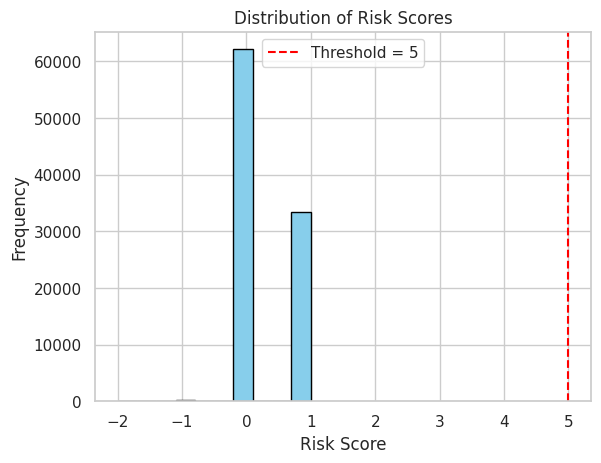

In [39]:
# Analyze the distribution of risk scores
import matplotlib.pyplot as plt

plt.hist(data['RiskScore'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.axvline(x=5, color='red', linestyle='--', label='Threshold = 5')  # Example threshold line
plt.legend()
plt.show()

# Set the threshold
threshold = 0  # Adjust this based on your analysis

In [40]:
# Classify users based on the risk score
data['RiskCategory'] = ['Good' if score > threshold else 'Bad' for score in data['RiskScore']]

# Display the classification results
print(data[['CustomerId', 'RiskScore', 'RiskCategory']].head())

        CustomerId  RiskScore RiskCategory
0  CustomerId_4406          0          Bad
1  CustomerId_4406          0          Bad
2  CustomerId_4683          0          Bad
3   CustomerId_988          1         Good
4   CustomerId_988          0          Bad


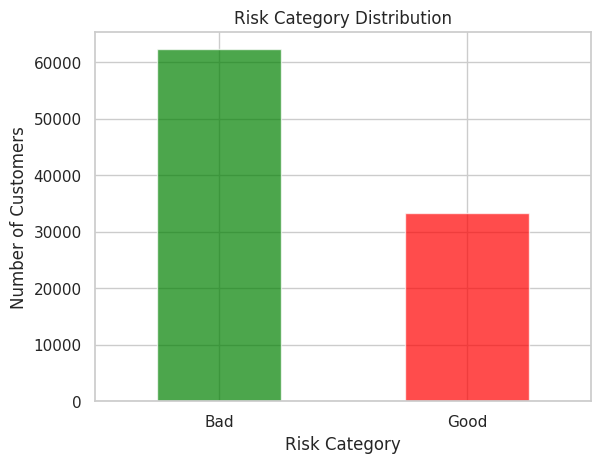

In [41]:
# Count the number of good and bad customers
risk_counts = data['RiskCategory'].value_counts()

# Plot the classification results
risk_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Risk Category Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [42]:
from sklearn.metrics import classification_report

# Assuming you have true labels for the customers in another column
# For demonstration, let's create a sample true label
data['TrueLabel'] = ['Good' if score > 5 else 'Bad' for score in data['RiskScore']]

# Generate classification report
print(classification_report(data['TrueLabel'], data['RiskCategory']))

/home/aman/Documents/10Academy/week6/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aman/Documents/10Academy/week6/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         Bad       1.00      0.65      0.79     95662
        Good       0.00      0.00      0.00         0

    accuracy                           0.65     95662
   macro avg       0.50      0.33      0.39     95662
weighted avg       1.00      0.65      0.79     95662



/home/aman/Documents/10Academy/week6/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


>>> ### RFMS score

In [43]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Calculate Recency (days since last transaction)
recency_df = data.groupby('CustomerId')['TransactionStartTime'].max().reset_index()
recency_df['Recency'] = (data['TransactionStartTime'].max() - recency_df['TransactionStartTime']).dt.days

# Calculate Frequency (number of transactions)
frequency_df = data.groupby('CustomerId')['TransactionId'].count().reset_index()
frequency_df.columns = ['CustomerId', 'Frequency']

# Calculate Monetary Value (total transaction amount)
monetary_df = data.groupby('CustomerId')['Amount'].sum().reset_index()
monetary_df.columns = ['CustomerId', 'Monetary']

# Merge RFMS data
rfms_df = recency_df.merge(frequency_df, on='CustomerId').merge(monetary_df, on='CustomerId')

# Normalize RFMS scores
rfms_df['RecencyScore'] = pd.qcut(rfms_df['Recency'], 4, labels=[4, 3, 2, 1])  # Lower recency is better
rfms_df['FrequencyScore'] = pd.qcut(rfms_df['Frequency'], 4, labels=[1, 2, 3, 4])  # Higher frequency is better
rfms_df['MonetaryScore'] = pd.qcut(rfms_df['Monetary'], 4, labels=[1, 2, 3, 4])  # Higher monetary is better

# Calculate Total RFMS Score
rfms_df['TotalRFMS'] = rfms_df['RecencyScore'].astype(int) + rfms_df['FrequencyScore'].astype(int) + rfms_df['MonetaryScore'].astype(int)

# Display RFMS DataFrame
print(rfms_df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'TotalRFMS']].head())

        CustomerId  Recency  Frequency  Monetary  TotalRFMS
0     CustomerId_1       83          1  -10000.0          3
1    CustomerId_10       83          1  -10000.0          3
2  CustomerId_1001       89          5   20000.0          5
3  CustomerId_1002       25         11    4225.0          7
4  CustomerId_1003       11          6   20000.0          7


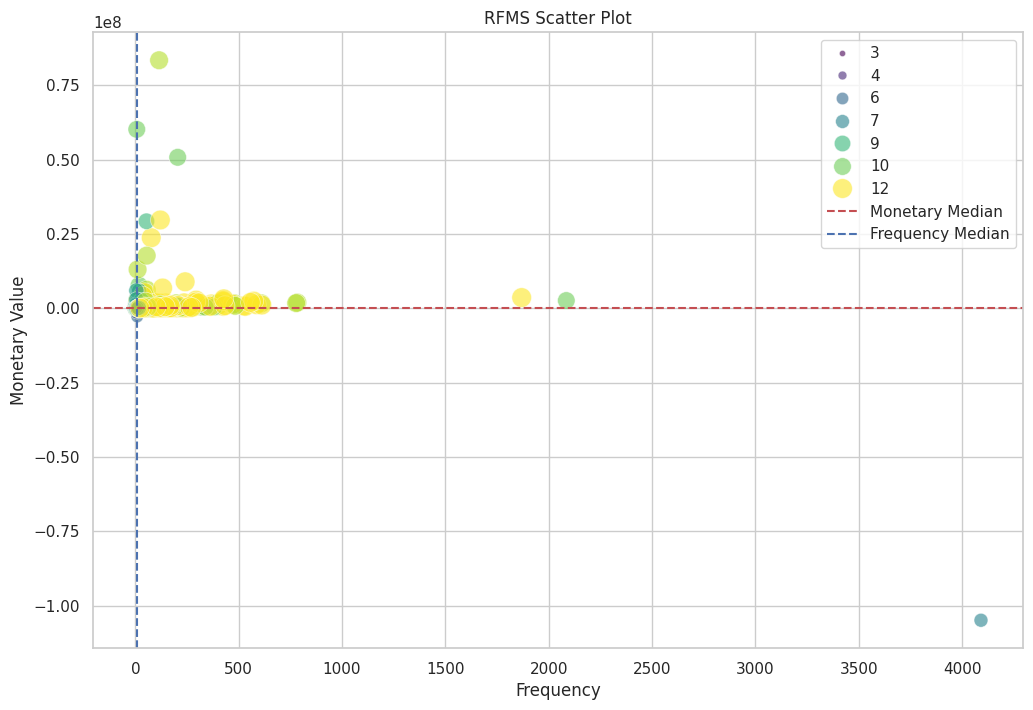

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfms_df, x='Frequency', y='Monetary', size='TotalRFMS', sizes=(20, 200), alpha=0.6, hue='TotalRFMS', palette='viridis')

plt.title('RFMS Scatter Plot')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.axhline(y=rfms_df['Monetary'].median(), color='r', linestyle='--', label='Monetary Median')
plt.axvline(x=rfms_df['Frequency'].median(), color='b', linestyle='--', label='Frequency Median')
plt.legend()
plt.show()

In [45]:
def classify_rfms(row):
    if row['Frequency'] >= rfms_df['Frequency'].median() and row['Monetary'] >= rfms_df['Monetary'].median():
        return 'Good'
    else:
        return 'Bad'

# Assign labels
rfms_df['RiskCategory'] = rfms_df.apply(classify_rfms, axis=1)

# Display the updated DataFrame with Risk Categories
print(rfms_df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'TotalRFMS', 'RiskCategory']].head())

        CustomerId  Recency  Frequency  Monetary  TotalRFMS RiskCategory
0     CustomerId_1       83          1  -10000.0          3          Bad
1    CustomerId_10       83          1  -10000.0          3          Bad
2  CustomerId_1001       89          5   20000.0          5          Bad
3  CustomerId_1002       25         11    4225.0          7          Bad
4  CustomerId_1003       11          6   20000.0          7          Bad


In [58]:
rfms_df[rfms_df['RiskCategory']=='Good'].head()
data['rfms'] = rfms_df['TotalRFMS']

>>> ### WOE

In [52]:
def calculate_woe(data, feature, target):
    # Create a DataFrame to hold the WoE values
    woe_df = data.groupby(feature)[target].agg(['count', 'sum']).reset_index()
    woe_df.columns = [feature, 'Total', 'Bad']
    
    # Calculate Good and Bad counts
    woe_df['Good'] = woe_df['Total'] - woe_df['Bad']
    
    # Calculate the distribution of Bad and Good
    total_bad = woe_df['Bad'].sum()
    total_good = woe_df['Good'].sum()
    
    # Calculate WoE
    woe_df['WoE'] = np.log((woe_df['Good'] / total_good) / (woe_df['Bad'] / total_bad))
    
    return woe_df[[feature, 'WoE']]

In [59]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Year,ProductCategory_Label,ChannelId_Label,CurrencyCode_Label,RiskScore,RiskCategory,TrueLabel,is_default,WoE,rfms
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,...,2018.0,0.0,2.0,0.0,0,Bad,Bad,0,1.620379,3.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256.0,ProviderId_4,ProductId_6,financial_services,...,2018.0,2.0,1.0,0.0,0,Bad,Bad,0,-0.565446,3.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,ProviderId_6,ProductId_1,airtime,...,2018.0,0.0,2.0,0.0,0,Bad,Bad,0,1.620379,5.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,...,2018.0,8.0,2.0,0.0,1,Good,Bad,0,-1.134962,7.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256.0,ProviderId_4,ProductId_6,financial_services,...,2018.0,2.0,1.0,0.0,0,Bad,Bad,0,-0.565446,7.0


In [61]:
data['is_default'] = np.where(data['FraudResult'] == 1, 1, 0) 
print(data['is_default'].value_counts())

is_default
0    95469
1      193
Name: count, dtype: int64


In [53]:
# Calculate WoE for ProductCategory
woe_product_category = calculate_woe(data, 'ProductCategory', 'is_default')

# Merge WoE values back to the original DataFrame
data = data.merge(woe_product_category, on='ProductCategory', how='left')

# Display the DataFrame with WoE values
print(data[['ProductCategory', 'WoE']].head())

      ProductCategory       WoE
0             airtime  1.620379
1  financial_services -0.565446
2             airtime  1.620379
3        utility_bill -1.134962
4  financial_services -0.565446


In [56]:
from sklearn.impute import SimpleImputer

X = data[['WoE', 'Amount']] 
y = data['is_default']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remove rows with NaN or infinite values
X_train = X_train[np.isfinite(X_train).all(axis=1)]
y_train = y_train[X_train.index]  # Align the target variable

X_test = X_test[np.isfinite(X_test).all(axis=1)]
y_test = y_test[X_test.index] 

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27669
           1       0.48      0.25      0.33        56

    accuracy                           1.00     27725
   macro avg       0.74      0.62      0.66     27725
weighted avg       1.00      1.00      1.00     27725

